In [98]:
import glob

import pandas
import seaborn

In [99]:
MODEL_PATH: str = "../../models/simon-muenker"

In [100]:
data: pandas.DataFrame = pandas.concat(
    [
        (
            pandas.read_json(file).assign(
                lang=file.split("-")[-1].split("/")[0], task=file.split("-")[-2].lower()
            )
        )
        for file in glob.glob(
            f"{MODEL_PATH}/**/test.tweeteval_corr.json", recursive=True
        )
    ]
)[["lang", "task", "model", "metric", "mean", "std"]]
data.head()

,lang,task,model,metric,mean,std
0,de,replies,adapter,results.emotions.anger,0.322042,0.223901
1,de,replies,adapter,results.emotions.anticipation,0.131113,0.124899
2,de,replies,adapter,results.emotions.disgust,0.311913,0.211172
3,de,replies,adapter,results.emotions.fear,0.572577,0.386273
4,de,replies,adapter,results.emotions.joy,0.115066,0.116169


In [101]:
aggregated = (
    data.assign(metric_group=list(data["metric"].str.extract(r"^results.(\w+).\w+")[0]))
    .groupby(["lang", "task", "model", "metric_group"])
    .mean(numeric_only=True)
)
aggregated

mean       std
lang task    model   metric_group                    
de   post    adapter emotions      0.170959  0.134397
                     hate          0.443243  0.122649
                     irony         0.131047  0.107031
                     offensive     0.196160  0.081868
                     sentiment     0.189208  0.106407
                     topics        0.255050  0.191444
             base    emotions      0.112084  0.150051
                     hate          0.197840  0.199457
                     irony        -0.207506  0.068797
                     offensive     0.169782  0.048192
                     sentiment     0.042505  0.104637
                     topics        0.248181  0.198802
     replies adapter emotions      0.199676  0.176663
                     hate          0.077473  0.081360
                     irony         0.115345  0.084706
                     offensive     0.217531  0.127800
                     sentiment     0.211050  0.089110
                     topics        0.059303  0.127776
             base    emotions      0.012307  0.122692
                     hate          0.070713  0.177739
                     irony         0.088147  0.118431
                     offensive     0.145996  0.093435
                     sentiment     0.075064  0.116200
                     topics        0.082750  0.137095
en   post    adapter emotions      0.562842  0.105576
                     hate          0.200700  0.164550
                     irony         0.353402  0.113443
                     offensive     0.563402  0.050838
                     sentiment     0.619436  0.083344
                     topics        0.645931  0.207756
             base    emotions      0.437139  0.108641
                     hate          0.327727  0.178525
                     irony         0.190044  0.085504
                     offensive     0.491321  0.061468
                     sentiment     0.435344  0.073695
                     topics        0.587457  0.189361
     replies adapter emotions      0.809817  0.076451
                     hate          0.625220  0.216746
                     irony         0.737492  0.083963
                     offensive     0.785902  0.058859
                     sentiment     0.841469  0.057920
                     topics        0.789114  0.193251
             base    emotions      0.336416  0.117895
                     hate          0.231435  0.191233
                     irony         0.169361  0.120493
                     offensive     0.379641  0.098491
                     sentiment     0.386371  0.113908
                     topics        0.337289  0.216657

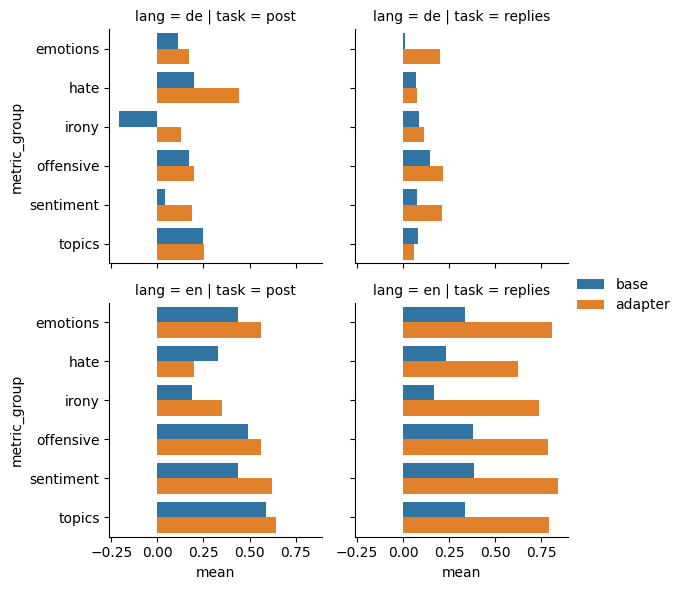

In [105]:
(
    seaborn.FacetGrid(aggregated.reset_index(), col="task", row="lang")
    .map_dataframe(
        seaborn.barplot,
        y="metric_group",
        x="mean",
        hue="model",
        hue_order=["base", "adapter"],
        palette=seaborn.color_palette()[:2],
    )
    .add_legend()
)